## 1. Data Pre-processing

In [1]:
import pandas as pd             # Library for data manipulation and analysis
import matplotlib.pyplot as plt # Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
import seaborn as sns           # Seaborn is a Python data visualization library based on matplotlib. 
import numpy as np              # NumPy is the fundamental package for scientific computing in Python.
from scipy.stats import norm    # SciPy in Python is an open-source library used for solving math, scientific, engg, and tech. problems.

%matplotlib inline 

In [2]:
train = pd.read_csv('train.csv') # Reading the given train data from the excel file
test = pd.read_csv('test.csv')   # Reading the given test data from the excel file

### (a) Data Normalization
### Transformation on the respones variable SalePrice
Let's check the distribution of the response variable SalePrice
It seems not very normal distributed, what can we do about it??
Please apply the log transformation on the price and plot the distribution of the sale price, is it more normal?

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

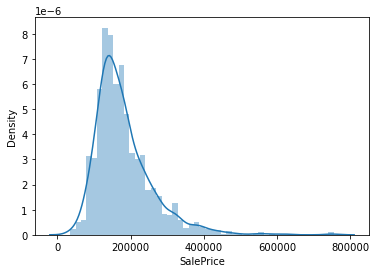

In [3]:
sns.distplot(train['SalePrice']) # Without using log

Without using the log function, the data does not appear to be normally distributed

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

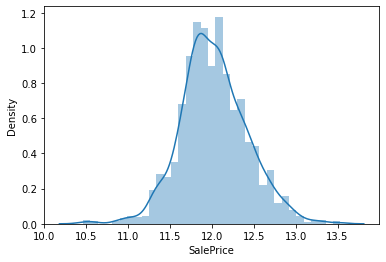

In [4]:
sns.distplot(np.log(train['SalePrice'])) # After using Log

Now after applying the log funtion the data appears to be normally distributed

### (b) Creating dummy variables
### Preprocessing: Deal with the missing data (NA) and create dummy variable for categorical variables

Please use the mean of the training data to fit in the NA in both training and testing data set. Please also create dummy variables for all the text dataset.

In [5]:
#--------------------------------------
test['SalePrice'] = 0  # Assigning 0 to the SalePrice in the test data
D = train.append(test) # The append() method in python adds a single item to the existing list

dummy = pd.get_dummies(D)                # Convert categorical variable into dummy/indicator variables.
dummy.fillna(dummy.mean(), inplace=True) # Fill NA/NaN values using the specified method.

# With iloc() function, we can retrieve a particular value belonging to a row and column using the index values assigned to it
train = dummy.iloc[0:1459,:]      # Retrieve a particular value from training data using iloc       
test = dummy.iloc[1460:2918,:]    # Retrieve a particular value from the test data using iloc

X = train.drop(['Id'], axis=1)    # Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names
Y = np.log(train['SalePrice'])    # Assigning Y as the log of Saleprice from training data
X_test = test.drop(['Id'], axis=1)
# -------------------------------------

## 3. RIDGE REGRESSION
### Model 1: Use Ridge regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


[5.0e-02 1.0e-01 3.0e-01 1.0e+00 3.0e+00 5.0e+00 1.0e+01 1.5e+01 3.0e+01
 5.0e+01 7.5e+01]
Best Cross validation parameter R2 is 0.9555093428657007 and best alpha is 5


Text(0.5, 1.0, 'Cross Validation for parameters - RIDGE REGRESSION')

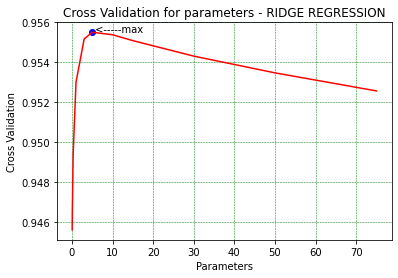

In [6]:
# Importing the required libraries 

from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75] # Given tuning parameters

# -----------------------------------------------------------------
# from sklearn.preprocessing import scale
crossval1 = np.array(alphas)  # Cross validation
print(crossval1)              # printing the cross validation array

for j, alpha in enumerate(alphas):
    R = Ridge(alpha=alpha)
    R.fit(X, Y)
    crossval1[j] = np.mean(cross_val_score(R, X, Y))

j_best_alpha_ridge = np.argmax(crossval1)
best_alpha_ridge = alphas[j_best_alpha_ridge]
print("Best Cross validation parameter R2 is",np.max(crossval1),"and best alpha is",best_alpha_ridge)

plt.plot(alphas, crossval1, color='red')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.scatter(5,0.9555093428657007,color='blue')
plt.annotate((" <-----max"),(5, 0.9555093428657007))
plt.xlabel('Parameters')
plt.ylabel('Cross Validation')
plt.title('Cross Validation for parameters - RIDGE REGRESSION')
# -----------------------------------------------------------------

## 2. LASSO REGRESSION
### Model 2: Use Lasso regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


[5.0e-02 1.0e-01 3.0e-01 1.0e+00 3.0e+00 5.0e+00 1.0e+01 1.5e+01 3.0e+01
 5.0e+01 7.5e+01]
[0.94171185 0.92666377 0.91597234 0.91754702 0.90292258]
[0.9419927  0.9253029  0.9145539  0.91622693 0.90398691]
[0.94120436 0.92532393 0.90930159 0.91199716 0.90575193]
[0.93014188 0.91689029 0.89269549 0.89724837 0.89344865]
[0.92748477 0.91228296 0.88756796 0.89279008 0.8900613 ]
[0.92504029 0.90815526 0.88289165 0.88860138 0.8847214 ]
[0.92392832 0.90819919 0.8825116  0.88753832 0.88410419]
[0.92390042 0.90821874 0.88255959 0.8875214  0.88408922]
[0.92380226 0.90814355 0.88269346 0.8874681  0.88415953]
[0.92373529 0.90807246 0.8828381  0.88739657 0.88425247]
[0.92365059 0.90798255 0.88299787 0.88730747 0.88436736]
Best Cross validation parameter (Lasso) is 0.8975341433625138 and best alpha is 0.05


Text(0.5, 1.0, 'Cross Validation for parameters - LASSO REGRESSION')

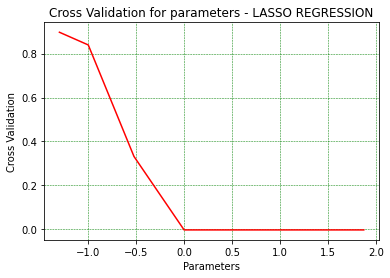

In [7]:
# ------------------------------------------------------------------------
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75] # We use the same alphas array given above.
crossval2 = np.array(alphas)
print(crossval2)

for i,alpha in enumerate(alphas):
    l = Lasso(alpha=alpha)
    l.fit(scale(X), Y)
    print(cross_val_score(l, X, Y))
    crossval2[i] = np.mean(cross_val_score(l, scale(X), Y,cv=5))

i_best_alpha_lasso = np.argmax(crossval2)
best_alpha_lasso = alphas[i_best_alpha_lasso]
print("Best Cross validation parameter (Lasso) is",np.max(crossval2), "and best alpha is",best_alpha_lasso)

plt.plot(np.log10(alphas), crossval2, color='red')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel('Parameters')
plt.ylabel('Cross Validation')
plt.title('Cross Validation for parameters - LASSO REGRESSION')
# --------------------------------------------------------------------------

# 4.
### Results
Lasso regression seems to have better result than Ridge regression because of the variable selection, but Lasso with a smaller lambda runs into the accuracy issue. The reason is that the columns must be strongly correlated.

In [8]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

ridge_test = Ridge(alpha=best_alpha_ridge)
ridge_test.fit(scale(X), Y)
ridge_test.predict(scale(X_test))

array([11.94650911, 12.08677181, 12.11025132, ..., 11.69482469,
       12.09779315, 11.86664994])

In [9]:
lasso_test = Lasso(alpha=best_alpha_lasso)
lasso_test.fit(scale(X), Y)
lasso_test.predict(scale(X_test))

array([11.98311934, 12.00920481, 12.00370676, ..., 11.95805649,
       11.9986019 , 11.97398566])

# 5. 
We would like to estimate the bias and variance trade-off of the Ridge regression and Lasso method. As mentioned in class, it is often hard to obtain the bias and variance term given the true model coeffcient is often unknown. Here, we will use a library `mlx-tend` to estimate the Bias and Variance using the Bootstrap sampling technique. For the same range of tuning parameters, please plot the Bias and variance trade-off curve for different choice of for both Ridge regression and Lasso problem.

In [10]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split

X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)

tree = DecisionTreeClassifier(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.063
Average bias: 0.050
Average variance: 0.026
